In [1]:
#import pyspark
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression

In [2]:
#os.chdir('../Project/finding-elo/')
#sc = pyspark.SparkContext()

In [2]:

with open('data_uci.pgn') as f:
    games = f.readlines()
for i in range(len(games)):
    games[i] = games[i].rstrip()

train = games[0:300000]
test = games[300000:]

train[-12:]

['[Event "25000"]',
 '[Site "kaggle.com"]',
 '[Date "??"]',
 '[Round "??"]',
 '[White "??"]',
 '[Black "??"]',
 '[Result "0-1"]',
 '[WhiteElo "1717"]',
 '[BlackElo "2098"]',
 '',
 'e2e4 c7c5 g1f3 d7d6 d2d4 c5d4 f3d4 g8f6 b1c3 b8c6 c1g5 e7e6 d1d2 f8e7 f1e2 e8g8 e1c1 a7a6 f2f4 d8c7 e2f3 a8b8 h2h4 h7h6 g5f6 e7f6 d4c6 b7c6 b2b3 c7a5 c3a4 a5a4 b3a4 f6b2 c1b1 b2c3 b1c1 c3d2 d1d2 d6d5 c2c3 a6a5 d2b2 c8a6 b2b8 f8b8 c1c2 g8f8 e4e5 a6c4 h1b1 c4d3 c2d3 b8b1 d3c2 b1f1 c2b3 h6h5 b3c2 g7g6 c2b3 f8e7 b3c2 f1a1 c2b2 a1h1 0-1',
 '']

In [3]:
result,whiteelo,blackelo = [],[],[]
for i in train:
    if "Result" in i:
        result.append(i)
    elif "WhiteElo" in i:
        whiteelo.append(i)
    elif "BlackElo" in i:
        blackelo.append(i)
    
for i in range(len(result)):
    if result[i][10] == '/':
        result[i] = 0.5
    elif result[i][9] == '0':
        result[i] = 0
    else:
        result[i] = 1
    blackelo[i] = int(blackelo[i].split()[1][1:5])
    whiteelo[i] = int(whiteelo[i].split()[1][1:5])



In [4]:
print(len(result),len(whiteelo),len(blackelo))

25000 25000 25000


In [5]:
stockfish = pd.read_csv('stockfish.csv')

In [20]:
#sc.stop()

In [6]:
score_list = []
for i in stockfish.MoveScores[0:25000]:
    x=i.split()
    while 'NA' in x:
        x.remove('NA')
    x = [int(i) for i in x]
    x=[0]+x
    score_list.append(x)

In [7]:
def eval_moves(moves):
    score = 0
    for i in range(len(moves)-1):
        score = score + moves[i+1] - moves[i]
    return score
        
    
    
    
    

In [8]:
eval_moves(score_list[2])

-11544

In [9]:
score_list[2]

[0,
 26,
 51,
 68,
 57,
 65,
 77,
 48,
 93,
 61,
 63,
 63,
 58,
 53,
 46,
 69,
 29,
 30,
 27,
 -2,
 12,
 -11,
 0,
 -17,
 24,
 5,
 15,
 16,
 31,
 44,
 25,
 18,
 20,
 27,
 26,
 18,
 14,
 18,
 20,
 10,
 2,
 7,
 22,
 -28,
 -26,
 -30,
 -34,
 -29,
 -28,
 -49,
 -55,
 -51,
 -50,
 -82,
 -74,
 -83,
 -77,
 -92,
 -72,
 -105,
 -99,
 -106,
 -93,
 -129,
 -79,
 -87,
 -63,
 -66,
 -23,
 -34,
 -47,
 -37,
 -49,
 -76,
 -110,
 -90,
 -116,
 -193,
 -103,
 -144,
 -106,
 -108,
 -69,
 -80,
 -93,
 -96,
 -86,
 -105,
 -111,
 -138,
 25,
 -342,
 -335,
 -507,
 -534,
 -523,
 -494,
 -2427,
 -3977,
 -5009,
 -5103,
 -6282,
 -1273,
 -10851,
 -10958,
 -10866,
 -11544]

In [19]:
features = []
for i in range(25000):
    features.append([result[i],whiteelo[i]-blackelo[i],eval_moves(score_list[i])])



[0, -84, -11544]

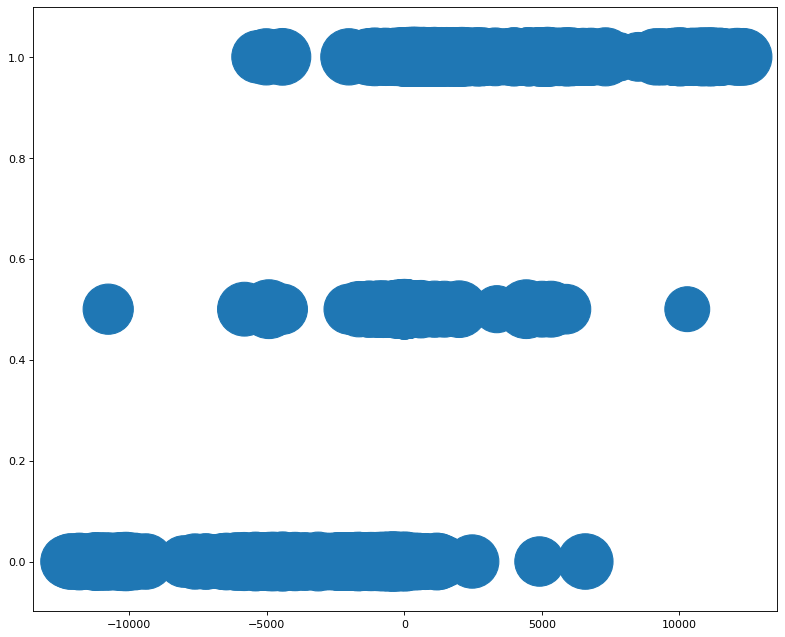

In [18]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(game_score,result)

In [54]:
model = LinearRegression().fit(np.array(features[:24000]), np.array(blackelo[:24000]))

In [56]:
mse=0
for i in range(24000,25000):
    x=model.predict(np.array(features[i]).reshape(1,-1))
    y=blackelo[i]
    mse= mse+((x-y)**2)**0.5
mse/1000
    

array([200.94875013])